In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import os.path as osp

In [21]:
depth = 1024
width = 100
height = 100

In [22]:
with open("config.json") as f:
    configs = json.load(f)

In [23]:
configs

{'image_dir': './imgs',
 'coe_dir': '../coes_1/rom.coe',
 'map_dir': '../coes_1/rom.json',
 'images': [{'name': 'bg.jpg', 'width': 100, 'height': 100, 'bg': True},
  {'name': 'apple.jpg', 'width': 100, 'height': 80},
  {'name': 'banana.jpg', 'width': 100, 'height': 80},
  {'name': 'watermelon.jpeg', 'width': 100, 'height': 80}]}

In [29]:
configs
addr_map = {}
lines = []
coes = []
def colorMap(rgb):
    retstr = ''
    for co in rgb:
        curco = co
        if(curco == 255):
            curco = 0
        retstr += hex(int(curco / 256 * 16))[2:][0].upper()
    return retstr
def getCOE(img):
    ret = []
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            ret.append(colorMap(img[x][y]))
    return ret

for image_dict in configs['images']:
    img_path = osp.join(configs['image_dir'], image_dict['name'])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (image_dict['width'], image_dict['height']))
    image_dict['addr'] = len(coes)
    coes.extend(getCOE(img))


lines.append('memory_initialization_radix=16;\n')
lines.append('memory_initialization_vector=' + ','.join(coes) + ';')

with open(configs['coe_dir'], 'w') as f:
    f.writelines(lines)

with open(configs['map_dir'], 'w') as f:
    json.dump(configs, f)

In [28]:
configs

{'image_dir': './imgs',
 'coe_dir': '../coes_1/rom.coe',
 'map_dir': '../coes_1/rom.json',
 'images': [{'name': 'bg.jpg',
   'width': 100,
   'height': 100,
   'bg': True,
   'addr': 0},
  {'name': 'apple.jpg', 'width': 100, 'height': 80, 'addr': 10000},
  {'name': 'banana.jpg', 'width': 100, 'height': 80, 'addr': 18000},
  {'name': 'watermelon.jpeg', 'width': 100, 'height': 80, 'addr': 26000}]}

In [3]:
img = cv2.imread('./bg.jpg')
img = img[:, :, ::-1]
print('The shape of this img is ' + str(img.shape))

TypeError: 'NoneType' object is not subscriptable

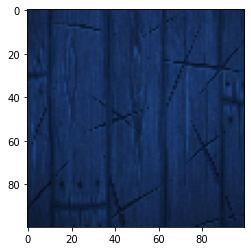

In [57]:
plt.imshow(img[:, :, (2, 1, 0)])

In [40]:
img = cv2.resize(img, (width, height))

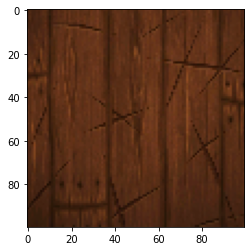

In [41]:
plt.imshow(img)

In [42]:
hex(10)[2:].upper()

'A'

In [43]:
coes = []
lines = []
def colorMap(rgb):
    retstr = ''
    for co in rgb:
        curco = co
        if(curco == 255):
            curco = 0
        retstr += hex(int(curco / 256 * 16))[2:][0].upper()
    return retstr
def getCOE(img):
    ret = []
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            ret.append(colorMap(img[x][y]))
    return ret

In [44]:
len(coes)

0

In [45]:
lines = []
coes = getCOE(img)
print(len(coes))
lines.append('memory_initialization_radix=16;\n')
lines.append('memory_initialization_vector=' + ','.join(coes))

10000


In [46]:
lines

['memory_initialization_radix=16;\n',
 'memory_initialization_vector=421,421,421,421,421,421,421,521,521,421,310,310,421,521,521,521,521,531,521,531,531,531,531,631,521,531,631,631,521,631,631,531,732,531,521,421,521,420,420,521,631,531,531,521,631,521,420,521,521,421,420,521,531,631,631,631,631,631,631,521,521,631,310,421,631,521,521,521,631,531,531,531,521,631,631,521,521,521,521,531,521,531,631,732,631,421,420,521,321,421,521,521,521,421,521,521,421,521,421,421,420,521,421,421,421,421,521,521,521,421,310,411,521,521,531,521,521,631,521,631,521,531,521,631,521,531,531,531,521,631,631,631,732,631,521,420,420,421,421,531,631,531,531,531,631,521,521,521,521,421,421,521,531,631,631,631,631,631,631,531,521,631,310,421,631,531,531,521,631,521,521,521,521,631,631,631,521,531,521,521,521,521,631,742,631,421,420,521,310,421,421,521,521,421,521,521,521,521,421,521,421,421,421,421,421,421,521,521,521,421,311,420,521,521,521,521,531,631,521,631,521,531,521,631,521,531,521,521,521,631,631,631,632

In [48]:
with open('result.coe', 'w') as f:
    f.writelines(lines)